<a href="https://colab.research.google.com/github/Nayani-j/F1--Data-Telemetry/blob/main/2024_Italy__telemetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.9 MB/s eta 0:00:00


In [ ]:
pip install windrose

In [ ]:
import os
import sys
import fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
import datetime
import seaborn as sns
sns.set_style("darkgrid")
import pandas as pd
import numpy as np
from windrose import WindroseAxes
pd.set_option('display.max_columns', None)


In [ ]:
year = 2024
location = 'MONZA'

# get session
"""
    session identifier:
    'FP1', 'FP2', 'FP3', 'Q', 'S', 'SQ', 'SS', 'R
    'Practice 1', 'Practice 2', 'Practice 3', 'Sprint Qualifying', 'Sprint', 'Sprint Shootout', 'Qualifying', 'Race'
"""

race = fastf1.get_session(year, location, 'R')
race.load(weather=True)

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loadin

In [ ]:
# load race laps
race_name = race.event.OfficialEventName
df = race.laps

# load dataframe of df (by Final Position in ascending order)
df = df.sort_values(by=['LapNumber','Position'], ascending=[False, True]).reset_index(drop=True)

# fill in empty laptime records and convert to seconds
df.LapTime = df.LapTime.fillna(df['Sector1Time']+df['Sector2Time']+df['Sector3Time'])
df.LapTime = df.LapTime.dt.total_seconds()
df.Sector1Time = df.Sector1Time.dt.total_seconds()
df.Sector2Time = df.Sector2Time.dt.total_seconds()
df.Sector3Time = df.Sector3Time.dt.total_seconds()

# weather
df_weather = race.weather_data.copy()
df_weather['Time'] = df_weather['Time'].dt.total_seconds()/60
df_weather = df_weather.rename(columns={'Time':'SessionTime(Minutes)'})

# Rain Indicator
rain = df_weather.Rainfall.eq(True).any()

In [ ]:
plt.style.use('dark_background')

/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:151: FutureWarning: The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.
  warnings.warn("The function `driver_color` is deprecated and will be "


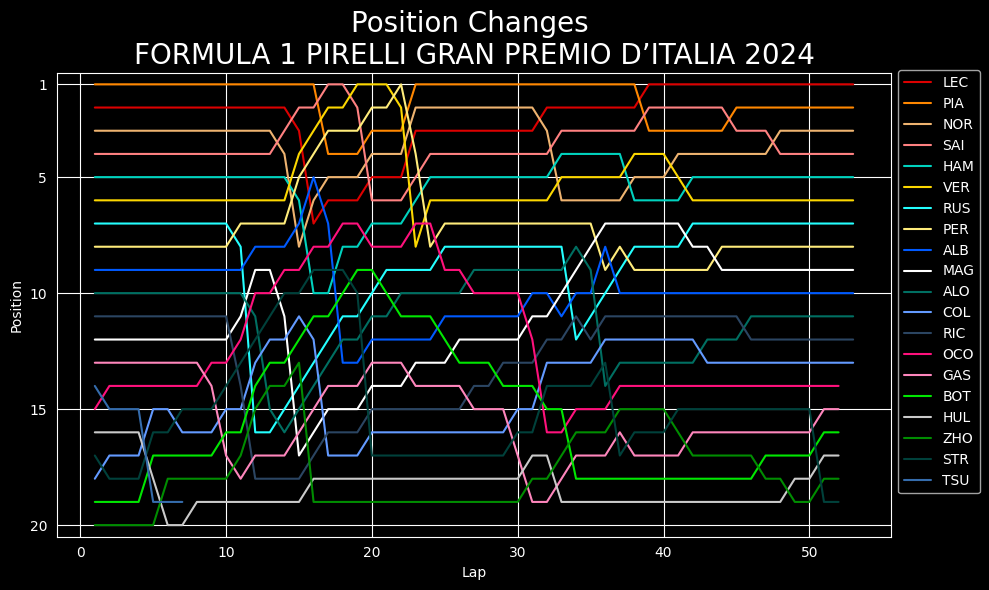

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

for drv in race.drivers:
    drv_laps = race.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]

    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'], label=abb, color=color)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
ax.legend(bbox_to_anchor=(1.0, 1.02))
ax.set_title('Position Changes \n'+race_name, fontsize=20)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:151: FutureWarning: The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.
  warnings.warn("The function `driver_color` is deprecated and will be "
<ipython-input-15-458e998dc983>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pitstop_driver_data.index, y=pitstop_driver_data.values, palette=driver_color, edgecolor='black')
<ipython-input-15-458e998dc983>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylim(pitstop_driver_data[0]-1, pitstop_driver_data[10]+5)
<ipython-input-15-458e998dc983>:21: Future

Text(0.5, 1.0, 'Total Time Spent on Pit Stops (Driver) \nFORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2024\n')

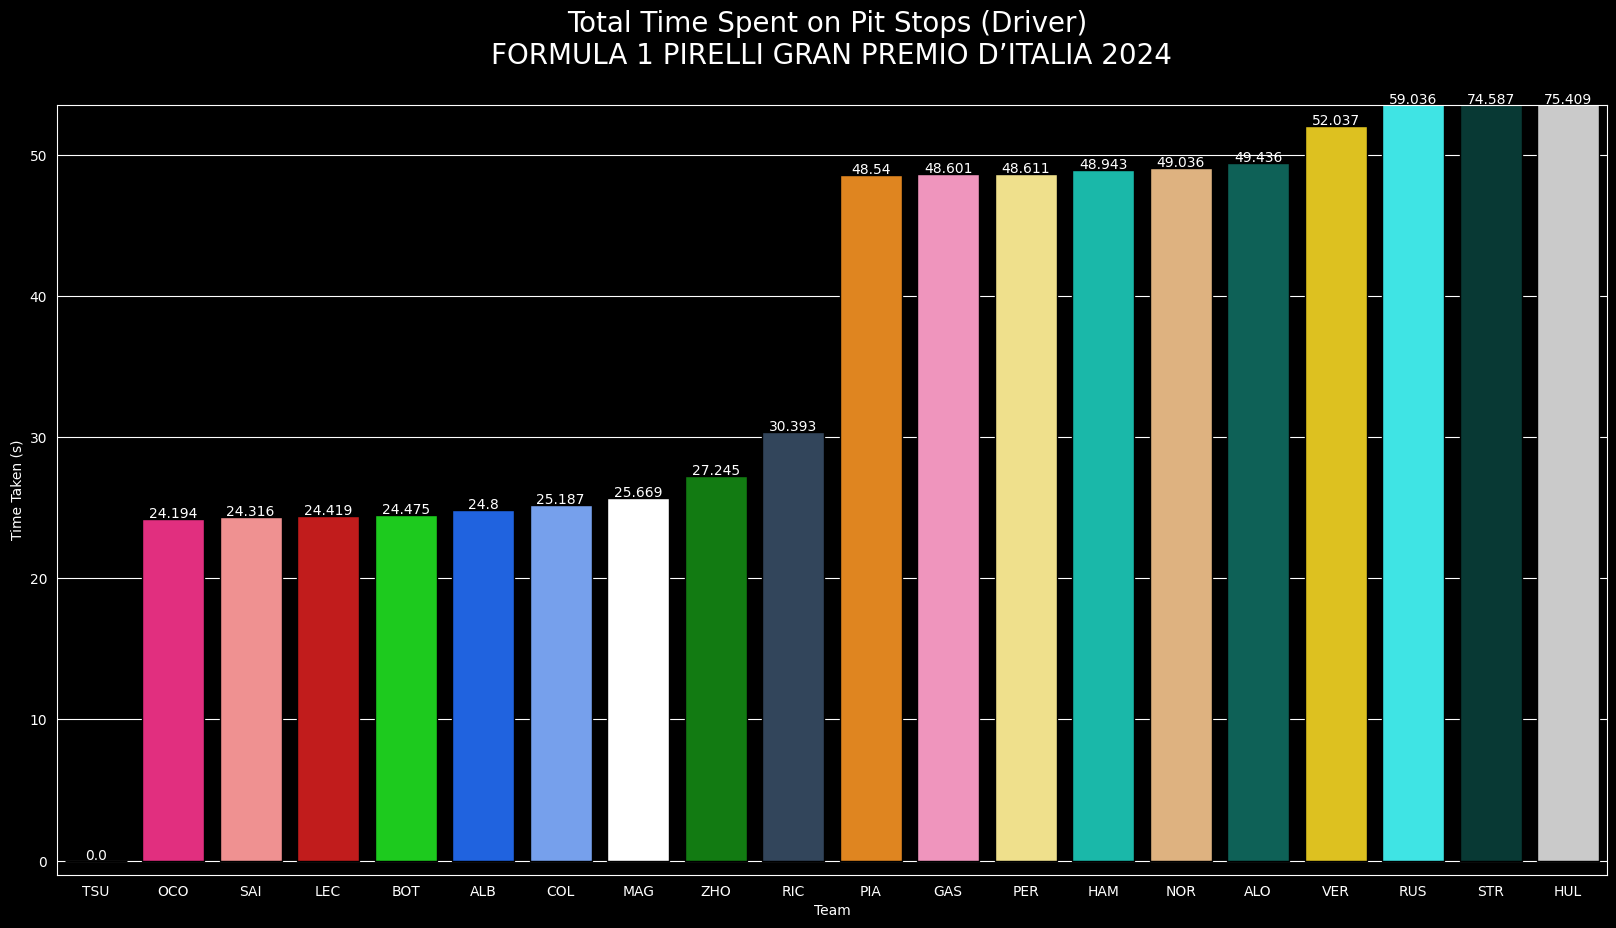

In [ ]:
# aggregrate for each driver
pitstop = df.loc[(df.LapNumber != 1.0) & (df.PitInTime.combine_first(df.PitOutTime).notnull()) , ['Team','Driver','LapNumber','PitOutTime', 'PitInTime']].sort_values(by=['Team','Driver','LapNumber']).reset_index()
pitstop['pittime'] = (pitstop.PitOutTime - pitstop.PitInTime.shift(1)).dt.total_seconds()

# aggregrate for each team
pitstop_team_data = pitstop.groupby(['Team'])['pittime'].mean().sort_values().round(3)

pitstop_driver_data = pitstop.groupby(['Driver'])['pittime'].sum().sort_values().round(3)

plt.figure(figsize=(20, 10))
driver_color = {}
for index,lap in df.iterrows():
    driver = lap['Driver']
    driver_color[driver] = fastf1.plotting.driver_color(driver)
sns.barplot(x=pitstop_driver_data.index, y=pitstop_driver_data.values, palette=driver_color, edgecolor='black')
plt.ylabel('Time Taken (s)')
plt.xlabel('Team')
plt.ylim(pitstop_driver_data[0]-1, pitstop_driver_data[10]+5)
# to add data labels
for i in range(len(pitstop_driver_data)):
    plt.text(i, min(pitstop_driver_data[i],pitstop_driver_data[10]+5)+0.1, pitstop_driver_data[i], ha = 'center')
plt.title('Total Time Spent on Pit Stops (Driver) \n'+race_name+'\n',  fontsize=20)

<ipython-input-16-c6b270a03de7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sector1['Sector1Time'], y=top_10_sector1['Driver'], palette=driver_color, ax=ax[0], edgecolor='black')
<ipython-input-16-c6b270a03de7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sector2['Sector2Time'], y=top_10_sector2['Driver'], palette=driver_color, ax=ax[1], edgecolor='black')
<ipython-input-16-c6b270a03de7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sector3['Sector3Time'], y=top_10_sector3['Driver'], palette=driver_c

Text(0.5, 1.0, 'Sector 3')

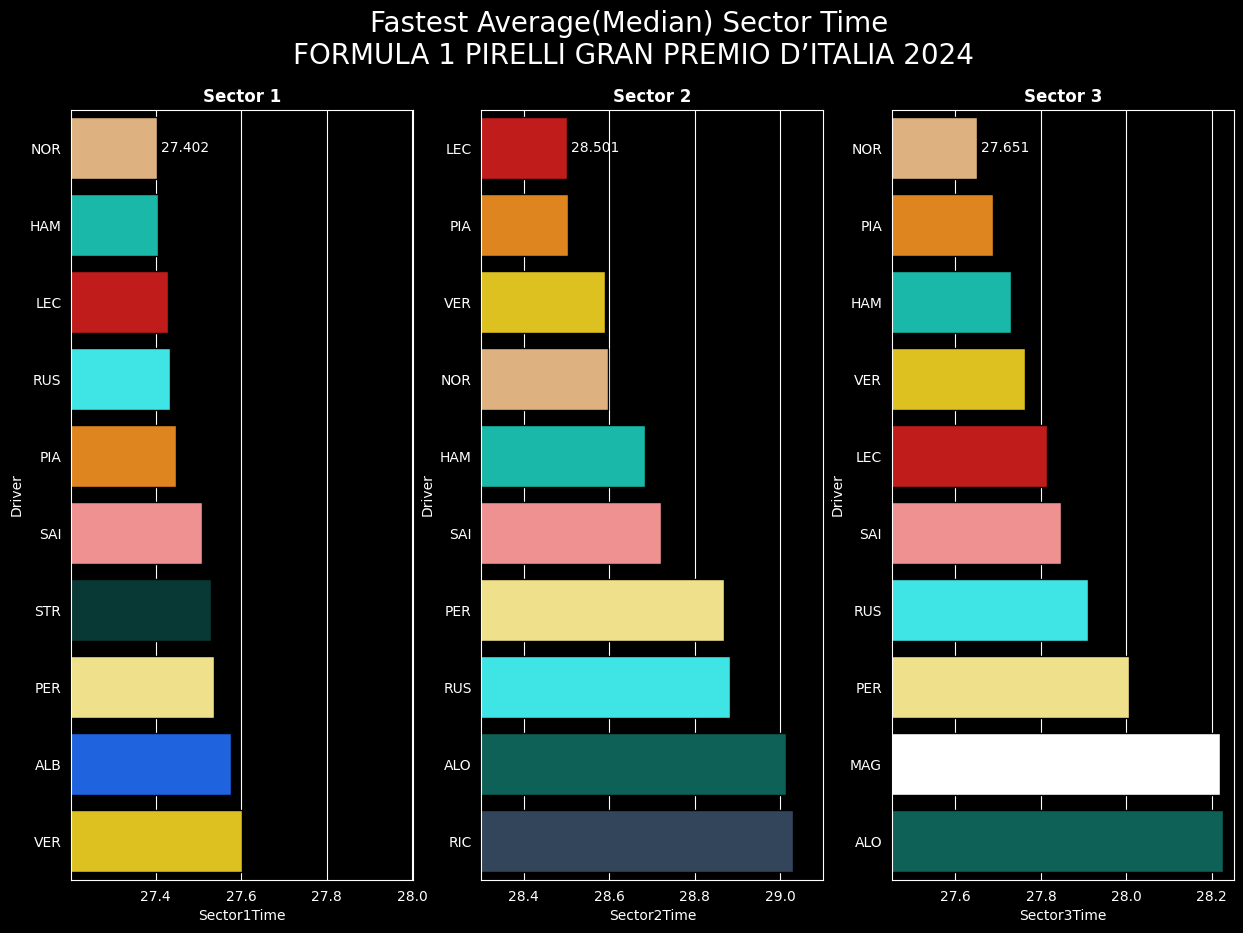

In [ ]:
# Get the top 10 fastest average(median) SectorTime
# use median to counter mixed conditions (exp: dry+wet)
top_10_sector1 = df.groupby(['Driver'])['Sector1Time'].median().sort_values().head(10).reset_index()
top_10_sector2 = df.groupby(['Driver'])['Sector2Time'].median().sort_values().head(10).reset_index()
top_10_sector3 = df.groupby(['Driver'])['Sector3Time'].median().sort_values().head(10).reset_index()

fig, ax = plt.subplots(1,3, figsize=(15, 10))
fig.suptitle('Fastest Average(Median) Sector Time \n'+race_name, fontsize=20)

# Sector 1
sns.barplot(x=top_10_sector1['Sector1Time'], y=top_10_sector1['Driver'], palette=driver_color, ax=ax[0], edgecolor='black')
ax[0].bar_label(ax[0].containers[0], padding=3)
ax[0].set_xlim(top_10_sector1.Sector1Time[0]-0.2,top_10_sector1.Sector1Time[0]+0.6)
ax[0].set_title('Sector 1', fontweight="bold")

# Sector 2
sns.barplot(x=top_10_sector2['Sector2Time'], y=top_10_sector2['Driver'], palette=driver_color, ax=ax[1], edgecolor='black')
ax[1].bar_label(ax[1].containers[0], padding=3)
ax[1].set_xlim(top_10_sector2.Sector2Time[0]-0.2,top_10_sector2.Sector2Time[0]+0.6)
ax[1].set_title('Sector 2', fontweight="bold")

# Sector 3
sns.barplot(x=top_10_sector3['Sector3Time'], y=top_10_sector3['Driver'], palette=driver_color, ax=ax[2], edgecolor='black')
ax[2].bar_label(ax[2].containers[0], padding=3)
ax[2].set_xlim(top_10_sector3.Sector3Time[0]-0.2,top_10_sector3.Sector3Time[0]+0.6)
ax[2].set_title('Sector 3', fontweight="bold")